In [45]:
!pip install fitter
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import normal
from sklearn.neighbors import KernelDensity
from sklearn import preprocessing
from scipy import stats as st
from sklearn.mixture import GaussianMixture as GMM
from fitter import Fitter, get_common_distributions, get_distributions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.2-py3-none-any.whl size=25608 sha256=cf3b283f09e63bdd52d098b9b7f065fabcc0963a42d804d4b02829cdf386a846
  Stored in directory: /root/.cache/pip/wheels/eb/50/1d/6d8762c6a9a50d3668e53f98164ba13ca314827fb5ac7ebeaa
Successfully built fitter


In [4]:
data = pd.read_csv('result2022.csv', delimiter=';', encoding='cp1251')
data.head()

,"Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ","Средний балл ЕГЭ студентов университета, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы Российской Федерации, за исключением лиц, поступивших с учетом особых прав и в рамках квоты целевого приема","Средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета с оплатой стоимости затрат на обучение физическими и юридическими лицами","Усредненный по реализуемым направлениям (специальностям) минимальный балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме на программы бакалавриата и специалитета","Численность студентов, победителей и призеров заключительного этапа всероссийской олимпиады школьников, членов сборных команд Российской Федерации, участвовавших в международных олимпиадах по общеобразовательным предметам по специальностям и (или) направлениям подготовки, соответствующим профилю всероссийской олимпиады школьников или международной олимпиады, принятых на очную форму обучения на первый курс по программам бакалавриата и специалитета без вступительных испытаний","Численность студентов, победителей и призеров олимпиад школьников, принятых на очную форму обучения на первый курс по программам бакалавриата и специалитета по специальностям и (или) направлениям подготовки, соответствующим профилю олимпиады школьников, без вступительных испытаний","Численность студентов, принятых по результатам целевого приема на первый курс на очную форму обучения по программам бакалавриата и специалитета","Удельный вес численности студентов, принятых по результатам целевого приема на первый курс на очную форму обучения по программам бакалавриата и специалитета в общей численности студентов, принятых на первый курс по программам бакалавриата и специалитета на очную форму обучения","Удельный вес численности студентов (приведенного контингента), обучающихся по программам магистратуры, в общей численности приведенного контингента обучающихся по образовательным программам бакалавриата, специалитета и магистратуры","Удельный вес численности обучающихся (приведенного контингента), по программам магистратуры, подготовки научно-педагогических кадров в аспирантуре (адъюнктуре), ординатуры, ассистентуры-стажировки в общей численности приведенного контингента обучающихся по основным образовательным программам высшего образования",...,Доля доходов вуза от образовательной деятельности в общих доходах вуза,Доля доходов вуза от научных исследований и разработок в общих доходах вуза,Доля внебюджетных средств в доходах от образовательной деятельности,Доля внебюджетных средств в доходах от научных исследований и разработок,VUZ,Region,Type,Site,ID,year
0,0,0,"61,28","48,28",0,0,0,0,"8,34","8,34",...,"80,76","4,42",100,100,Автономная некоммерческая образовательная орга...,Воронежская область,Частные образовательные организации,http://www.vepi.ru,110170,2022
1,"51,69","51,69","51,48","39,26",0,0,0,0,0,0,...,"66,01","11,19","34,13",100,Автономная некоммерческая образовательная орга...,Воронежская область,Частные образовательные организации,http://www.iict.ru,1996,2022
2,0,0,0,0,0,0,0,0,0,0,...,"97,58",0,100,0,Автономная некоммерческая образовательная орга...,Курская область,Частные образовательные организации,http://rfei.ru/,2071,2022
3,0,0,"55,7","55,7",0,0,0,0,0,0,...,"68,66","1,53",100,100,Автономная некоммерческая образовательная орга...,Московская область,Частные образовательные организации,https://www.pssi-k.ru/,666667486,2022
4,0,0,0,0,0,0,0,0,100,100,...,"9,09","85,08","9,77","12,17",Автономная некоммерческая образовательная орга...,г.Москва,Частные образовательные организации,www.skoltech.ru,113493,2022


# Step 1. Choose subsample with main variables for your further analysis.

In [175]:
data_subsample = data[['Доходы образовательной организации из всех источников в расчете на численность студентов (приведенный контингент)', 'Усредненный по реализуемым направлениям (специальностям) минимальный балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме на программы бакалавриата и специалитета', 'Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования РИНЦ, в расчете на 100 НПР[н]']]

In [176]:
data_subsample = data_subsample.rename(columns={'Доходы образовательной организации из всех источников в расчете на численность студентов (приведенный контингент)': 'income', 'Усредненный по реализуемым направлениям (специальностям) минимальный балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме на программы бакалавриата и специалитета': 'min_ege', 'Число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования РИНЦ, в расчете на 100 НПР[н]': 'works'})
data_subsample.head()

,income,min_ege,works
0,"294,97","48,28","55,17"
1,"165,28","39,26","105,26"
2,"209,62",0,"59,02"
3,"255,88","55,7","96,39"
4,"17160,32",0,"186,84"


In [169]:
data_subsample.dtypes

income     object
min_ege    object
workers     int64
dtype: object

In [177]:
data_subsample['income'] = data_subsample['income'].str.replace(',', '.').astype(np.float64)
data_subsample['min_ege'] = data_subsample['min_ege'].str.replace(',', '.').astype(np.float64)
data_subsample['works'] = data_subsample['works'].str.replace(',', '.').astype(np.float64)

In [178]:
data_subsample.dtypes

income     float64
min_ege    float64
works      float64
dtype: object

In [134]:
N = len(data_subsample.index)

In [135]:
def reduce_tails(feature):
    q1, q3 = np.percentile(feature, [25, 75])
    dfce = q3 - q1
    bottom_border, top_border = q1 - 1.5*dfce, q3 + 1.5*dfce
    feature = feature[feature > bottom_border]
    feature = feature[feature < top_border]
    return feature

# Non-parametric estimation of PDF in form of histogram and using kernel density function

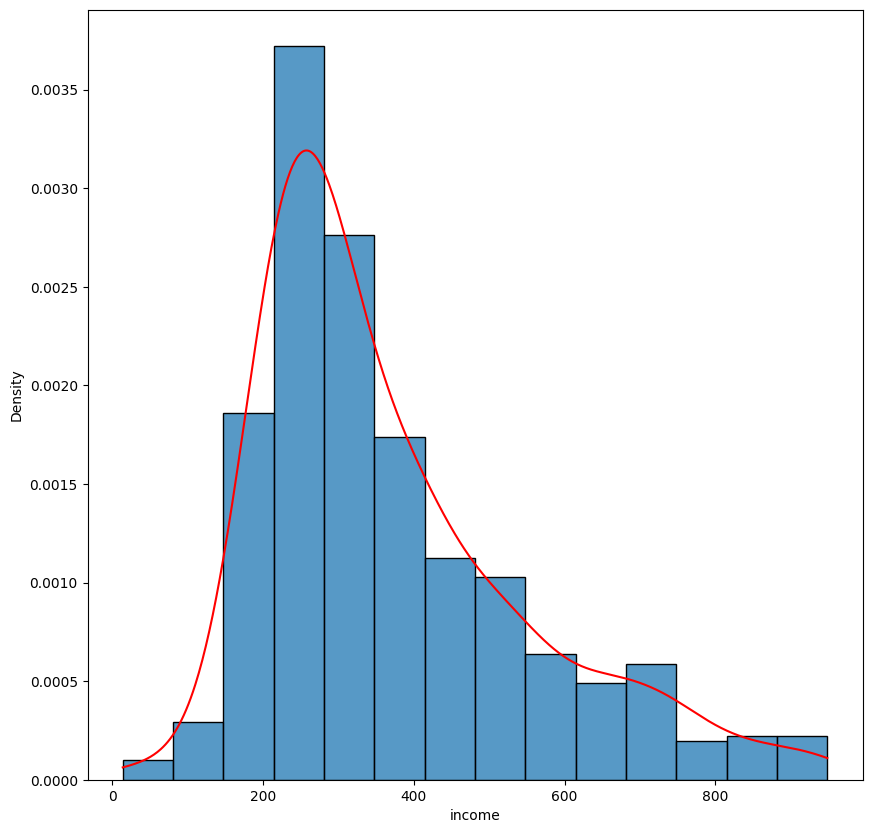

In [95]:
plt.figure(figsize=(10, 10))
data_income_buff = data_subsample[data_subsample.income > 0]
data_income = reduce_tails(data_income_buff['income'])
kernel = st.gaussian_kde(data_income)
min_amount, max_amount = data_income.min(), data_income.max()
x = np.linspace(min_amount, max_amount, len(data_income))
kde_values = kernel(x)

sns.histplot(data_income, kde=False, bins=int(5*math.log10(N)), stat='density')
plt.plot(x, kde_values, color='r')

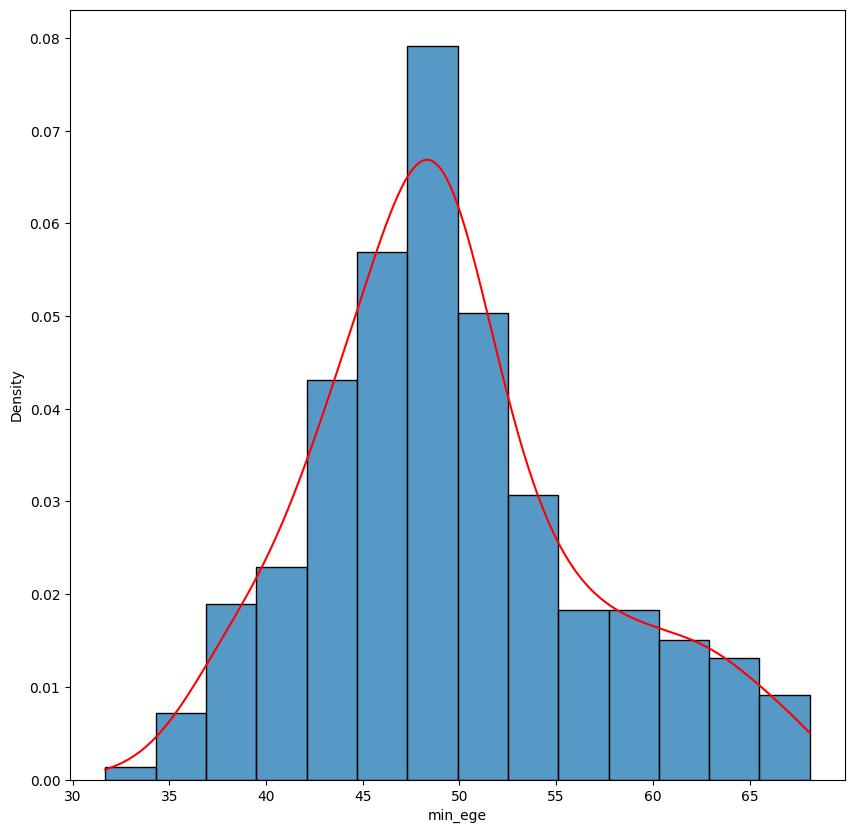

In [165]:
plt.figure(figsize=(10, 10))
data_min_ege_buff = data_subsample[data_subsample.min_ege > 0]
data_min_ege = reduce_tails(data_min_ege_buff['min_ege'])
kernel = st.gaussian_kde(data_min_ege)
min_amount, max_amount = data_min_ege.min(), data_min_ege.max()
x = np.linspace(min_amount, max_amount, len(data_min_ege))
kde_values = kernel(x)

sns.histplot(data_min_ege, kde=False, bins=int(5*math.log10(N)), stat='density')
plt.plot(x, kde_values, color='r')

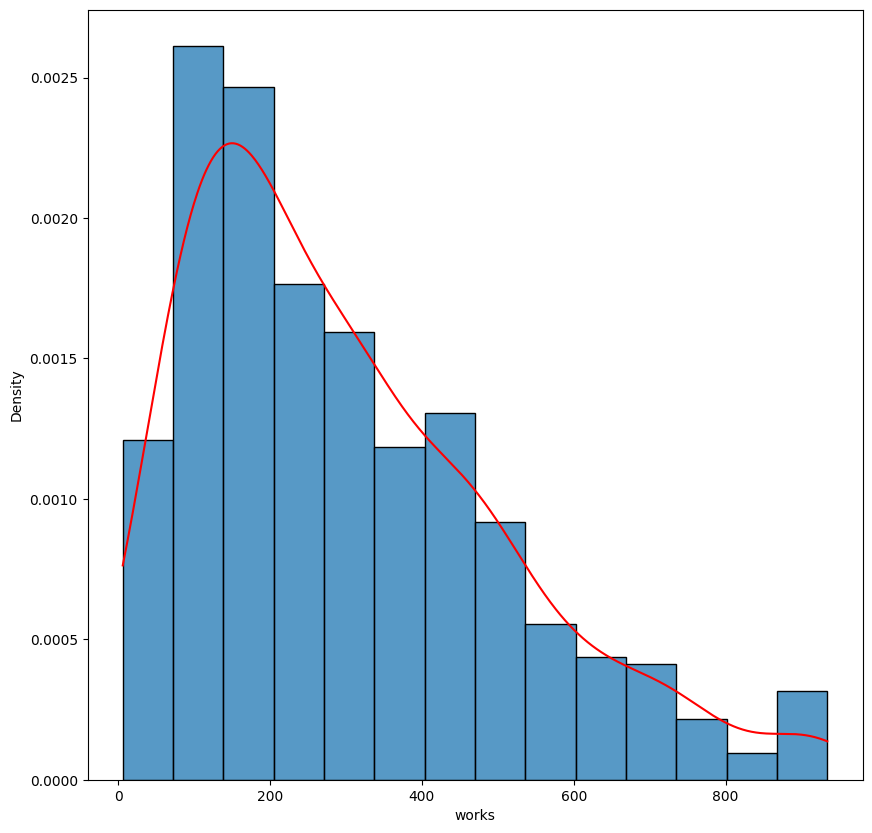

In [180]:
plt.figure(figsize=(10, 10))
data_works_buff = data_subsample[data_subsample.works > 0]
data_works = reduce_tails(data_works_buff['works'])
kernel = st.gaussian_kde(data_works)
min_amount, max_amount = data_works.min(), data_works.max()
x = np.linspace(min_amount, max_amount, len(data_works))
kde_values = kernel(x)

sns.histplot(data_works, kde=False, bins=int(5*math.log10(N)), stat='density')
plt.plot(x, kde_values, color='r')

# Estimation of order statistics and represent them as “box with whiskers” plot.

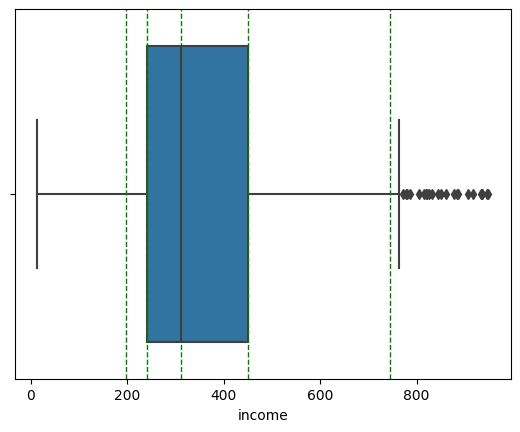

In [137]:
quantils = data_income.quantile([.1, .25, .5, .75, .95])
ax = sns.boxplot(x=data_income)
plt.axvline(x=quantils[0.10], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.25], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.50], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.75], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.95], linestyle='--', linewidth=1, color='green')

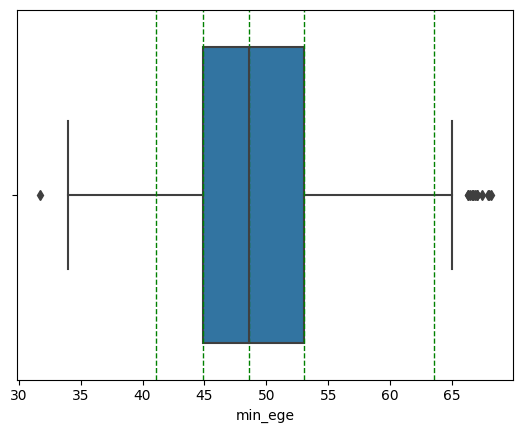

In [139]:
quantils = data_min_ege.quantile([.1, .25, .5, .75, .95])
ax = sns.boxplot(x=data_min_ege)
plt.axvline(x=quantils[0.10], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.25], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.50], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.75], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.95], linestyle='--', linewidth=1, color='green')

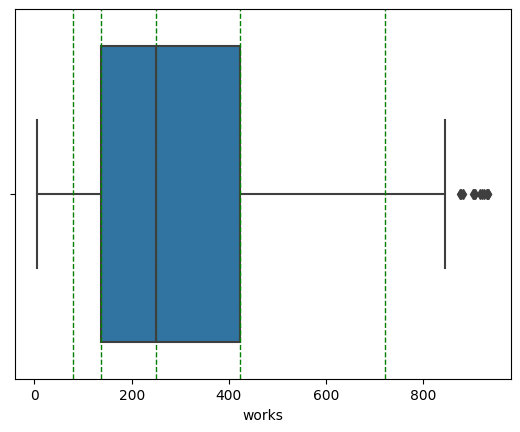

In [181]:
quantils = data_works.quantile([.1, .25, .5, .75, .95])
ax = sns.boxplot(x=data_works)
plt.axvline(x=quantils[0.10], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.25], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.50], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.75], linestyle='--', linewidth=1, color='green')
plt.axvline(x=quantils[0.95], linestyle='--', linewidth=1, color='green')

#Find one or several theoretical distributions that could describe your sample on a basis of non-parametric analysis results.

Fitting 5 distributions: 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000036,1511.098406,-10167.349635,inf,0.069261,5.359220e-03
gamma,0.000043,1499.408995,-10060.806427,inf,0.083127,3.974748e-04
chi2,0.000043,1499.408959,-10060.806423,inf,0.083127,3.974809e-04
gausshyper,0.000059,1471.486479,-9843.863215,inf,0.113791,2.330889e-07
norm,0.000073,1496.420268,-9743.793623,inf,0.135798,2.640635e-10


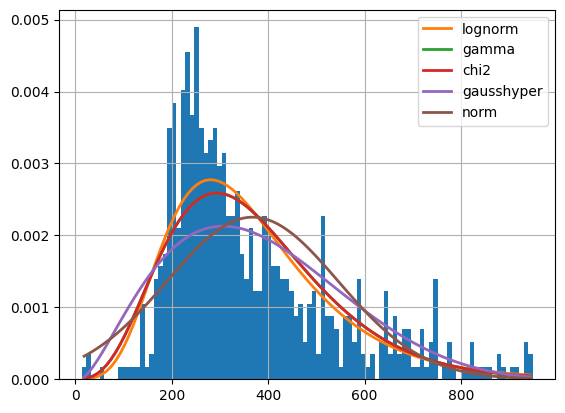

In [152]:
fitter_income = Fitter(data_income, distributions=['gamma', 'lognorm', 'norm', 'gausshyper', 'chi2'])
fitter_income.fit()
fitter_income.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.015604,818.576827,-6176.617035,inf,0.048857,0.116811
gamma,0.015859,818.134487,-6167.049656,inf,0.050986,0.090837
chi2,0.015859,818.134511,-6167.049630,inf,0.050986,0.090835
gausshyper,0.016798,822.372496,-6114.121186,inf,0.059978,0.027898
norm,0.019160,800.553579,-6062.273727,inf,0.082540,0.000622


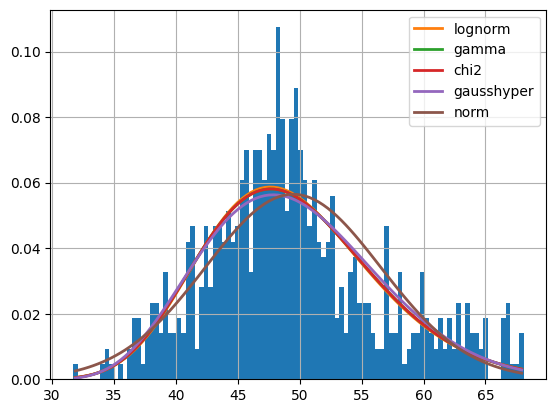

In [182]:
fitter_min_ege = Fitter(data_min_ege, distributions=['gamma', 'lognorm', 'norm', 'gausshyper', 'chi2'])
fitter_min_ege.fit()
fitter_min_ege.summary()

Fitting 5 distributions: 100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.000023,1460.321740,-10666.031281,inf,0.034432,4.403165e-01
chi2,0.000023,1460.321751,-10666.031196,inf,0.034432,4.403170e-01
gausshyper,0.000023,1457.922988,-10630.195943,inf,0.036555,3.660368e-01
norm,0.000044,1489.554012,-10256.508871,inf,0.101604,4.627252e-06
lognorm,0.000418,1771.757125,-8851.931023,inf,0.654111,7.382848e-262


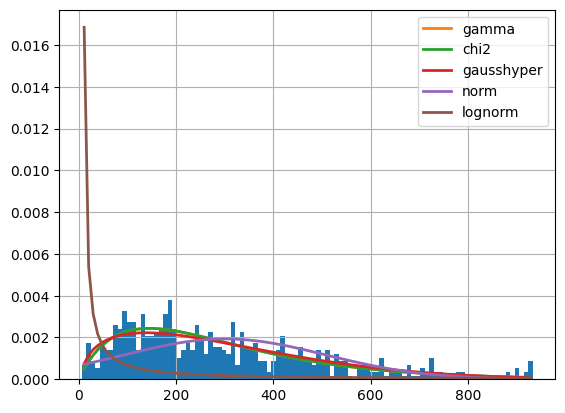

In [183]:
fitter_min_ege = Fitter(data_works, distributions=['gamma', 'lognorm', 'norm', 'gausshyper', 'chi2'])
fitter_min_ege.fit()
fitter_min_ege.summary()

# Estimate parameters of chosen distributions using methods of maximum likelihood and least squares method.

In [143]:
# maximum likelihood
max_like_income = st.lognorm.fit(data_income)
print(max_like_income)

(0.3853055926548753, -65.65877933170509, 402.0027388070016)


In [100]:
# least squares
def loss(params):
  ls = np.linspace(0.01, 0.95)
  quantiles = np.quantile(data_income, ls)
  approx = st.lognorm.ppf(ls, *params)
  return quantiles - approx

ls_income = scipy.optimize.least_squares(loss, (1.0, 1.0, 1.0))['x']
print(ls_income)

[  0.66033802  91.20669807 230.04751208]


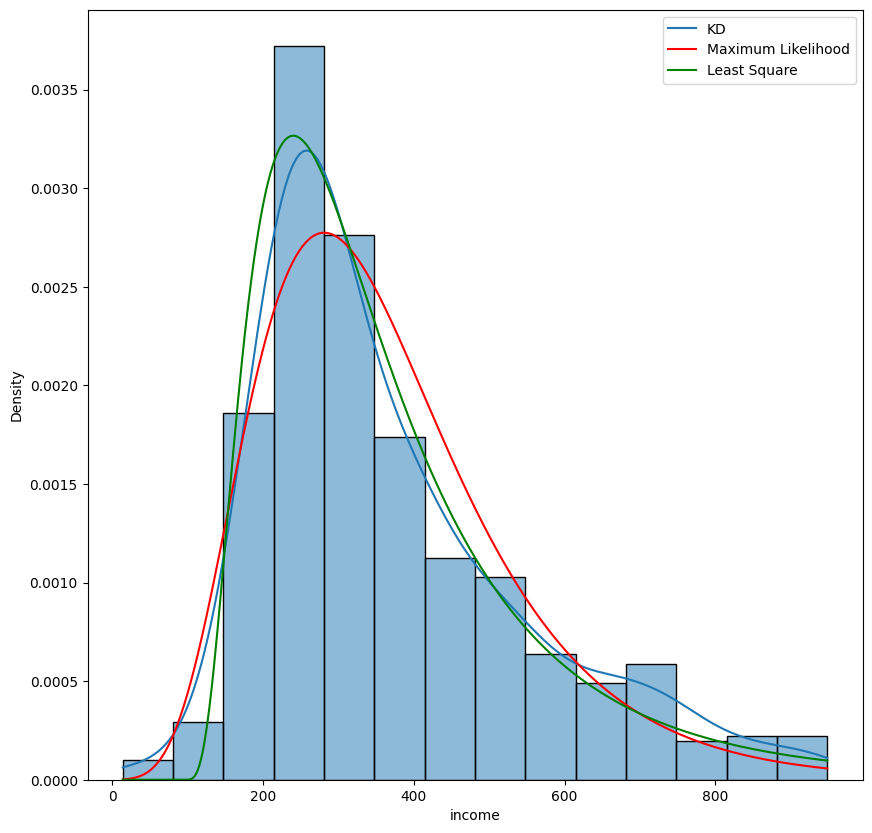

In [148]:
plt.figure(figsize=(10, 10))
sns.histplot(data_income, kde=True, bins=int(5 * math.log10(N)), stat='density')
x = np.linspace(data_income.min(), data_income.max(), len(data_income))
plt.plot(x, st.lognorm.pdf(x, *max_like_income) , 'r')
plt.plot(x, st.lognorm.pdf(x, *ls_income), "g")
plt.legend(['KD', 'Maximum Likelihood', 'Least Square'])
plt.show()

In [184]:
# maximum likelihood
max_like_min_ege = st.lognorm.fit(data_min_ege)
print(max_like_min_ege)

(0.1784314129258256, 10.12446638393578, 38.71976347730469)


In [155]:
# least squares
def loss(params):
  ls = np.linspace(0.01, 0.95)
  quantiles = np.quantile(data_min_ege, ls)
  approx = st.lognorm.ppf(ls, *params)
  return quantiles - approx

ls_min_ege = scipy.optimize.least_squares(loss, (1.0, 1.0, 1.0))['x']
print(ls_min_ege)

[ 0.28344949 23.86822123 24.74027509]


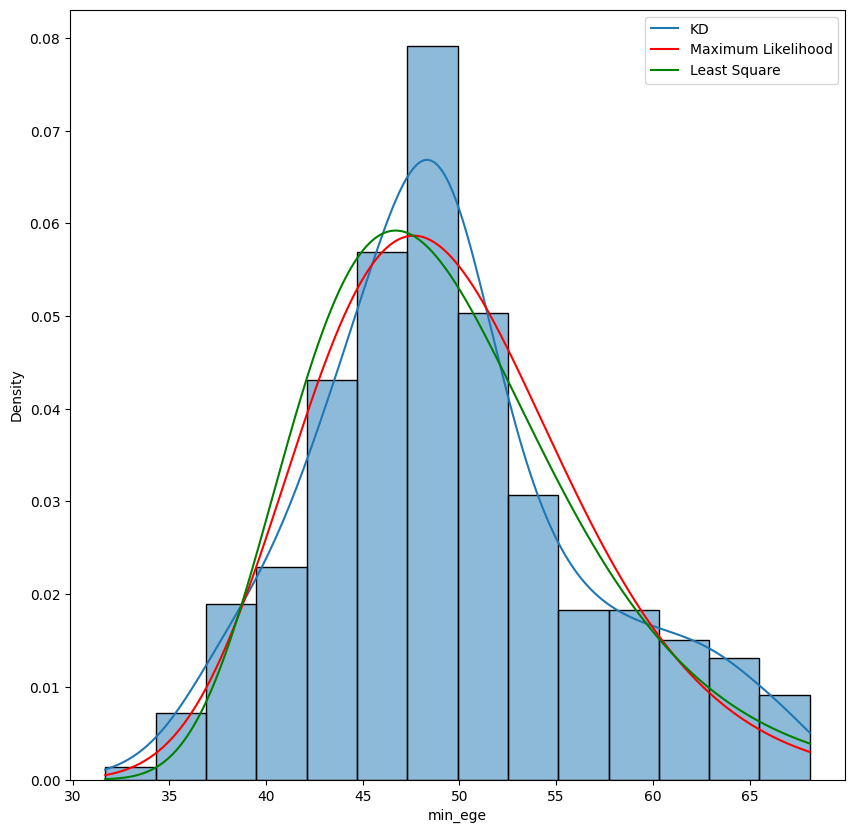

In [189]:
plt.figure(figsize=(10, 10))
sns.histplot(data_min_ege, kde=True, bins=int(5 * math.log10(N)), stat='density')
x = np.linspace(data_min_ege.min(), data_min_ege.max(), len(data_min_ege))
plt.plot(x, st.lognorm.pdf(x, *max_like_min_ege) , 'r')
plt.plot(x, st.lognorm.pdf(x, *ls_min_ege), "g")
plt.legend(['KD', 'Maximum Likelihood', 'Least Square'])
plt.show()

In [185]:
# maximum likelihood
max_like_works = st.gamma.fit(data_works)
print(max_like_works)

(1.9301274805021764, -0.09374786691324997, 155.66678400625327)


In [186]:
# least squares
def loss(params):
  ls = np.linspace(0.01, 0.95)
  quantiles = np.quantile(data_works, ls)
  approx = st.gamma.ppf(ls, *params)
  return quantiles - approx

ls_works = scipy.optimize.least_squares(loss, (1.0, 1.0, 1.0))['x']
print(ls_works)

[  2.01811822  -9.30870733 155.50340369]


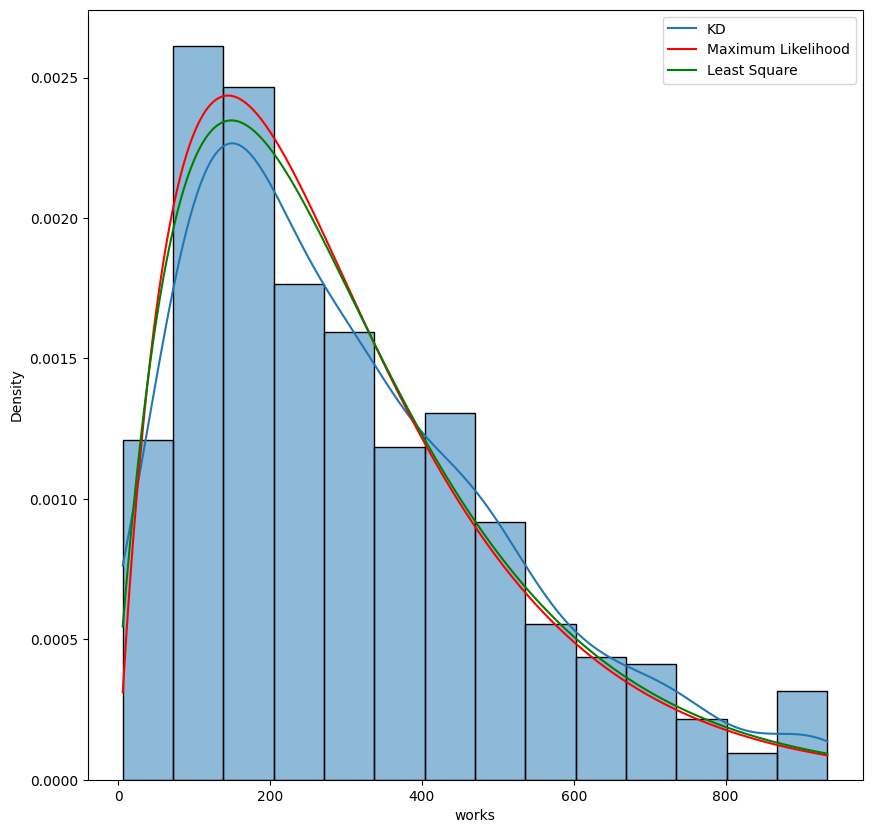

In [190]:
plt.figure(figsize=(10, 10))
sns.histplot(data_works, kde=True, bins=int(5 * math.log10(N)), stat='density')
x = np.linspace(data_works.min(), data_works.max(), len(data_works))
plt.plot(x, st.gamma.pdf(x, *max_like_works) , 'r')
plt.plot(x, st.gamma.pdf(x, *ls_works), "g")
plt.legend(['KD', 'Maximum Likelihood', 'Least Square'])
plt.show()

# Validate your estimated parameters using QQ biplots.

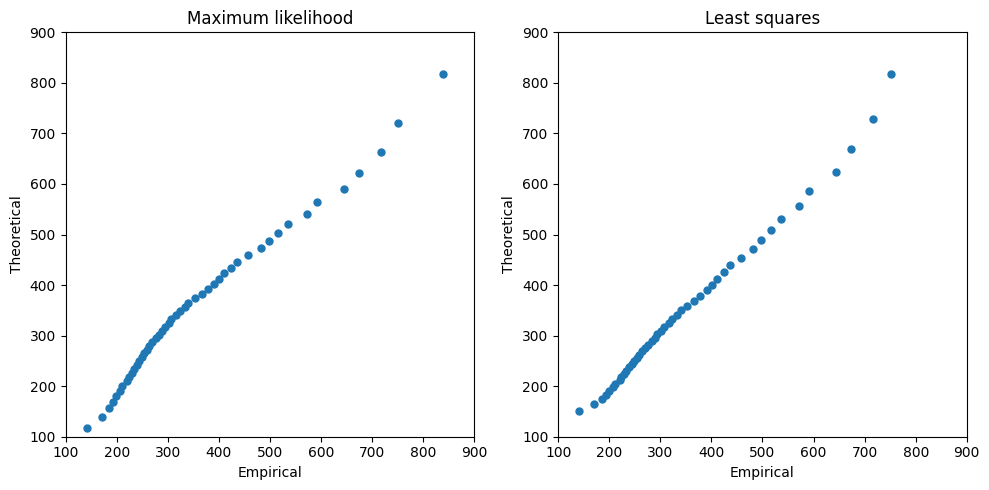

In [158]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
percs = np.linspace(0, 100, 50)
qn = np.percentile(data_income, percs)
ml = st.lognorm.ppf(percs / 100.0, *max_like_income)
ls = st.lognorm.ppf(percs / 100.0, *ls_income)
ax1.plot(qn, ml, ls="", marker="o", markersize=5)
ax1.plot(x, x, color="r")
ax1.set_xlabel('Empirical')
ax1.set_ylabel('Theoretical')
ax1.set_title('Maximum likelihood')
ax1.set_xlim(100, 900)
ax1.set_ylim(100, 900)
ax2.plot(qn, ls, ls="", marker="o", markersize=5)
ax2.plot(x, x, color="r")

ax2.set_xlabel('Empirical')
ax2.set_ylabel('Theoretical')
ax2.set_title('Least squares')
ax2.set_xlim(100, 900)
ax2.set_ylim(100, 900)

plt.tight_layout()

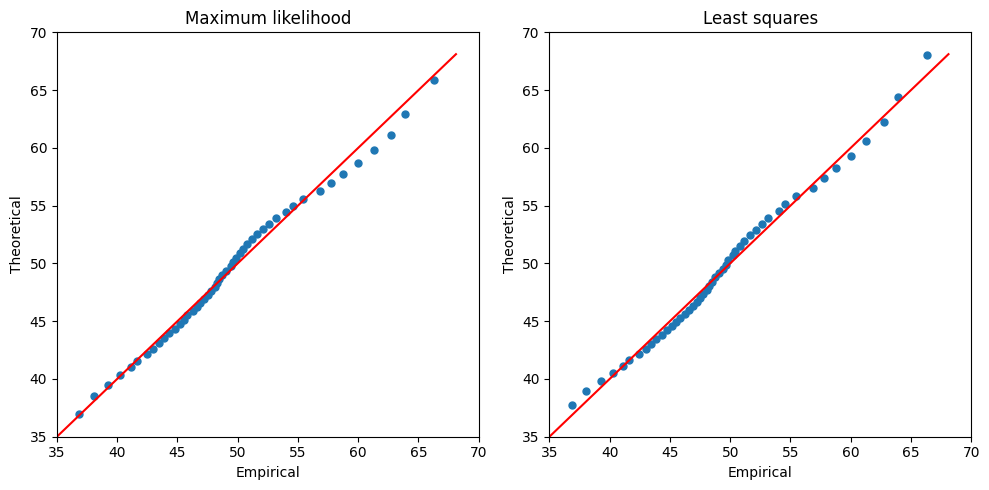

In [163]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
percs = np.linspace(0, 100, 50)
qn = np.percentile(data_min_ege, percs)
ml = st.lognorm.ppf(percs / 100.0, *max_like_min_ege)
ls = st.lognorm.ppf(percs / 100.0, *ls_min_ege)
ax1.plot(qn, ml, ls="", marker="o", markersize=5)
ax1.plot(x, x, color="r")
ax1.set_xlabel('Empirical')
ax1.set_ylabel('Theoretical')
ax1.set_title('Maximum likelihood')
ax1.set_xlim(35, 70)
ax1.set_ylim(35, 70)
ax2.plot(qn, ls, ls="", marker="o", markersize=5)
ax2.plot(x, x, color="r")

ax2.set_xlabel('Empirical')
ax2.set_ylabel('Theoretical')
ax2.set_title('Least squares')
ax2.set_xlim(35, 70)
ax2.set_ylim(35, 70)

plt.tight_layout()

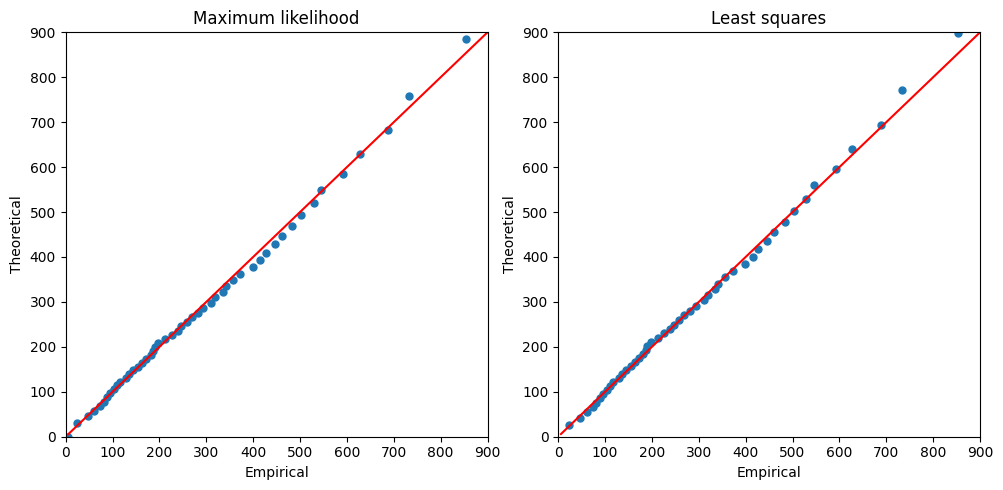

In [192]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
percs = np.linspace(0, 100, 50)
qn = np.percentile(data_works, percs)
ml = st.gamma.ppf(percs / 100.0, *max_like_works)
ls = st.gamma.ppf(percs / 100.0, *ls_works)
ax1.plot(qn, ml, ls="", marker="o", markersize=5)
ax1.plot(x, x, color="r")
ax1.set_xlabel('Empirical')
ax1.set_ylabel('Theoretical')
ax1.set_title('Maximum likelihood')
ax1.set_xlim(0, 900)
ax1.set_ylim(0, 900)
ax2.plot(qn, ls, ls="", marker="o", markersize=5)
ax2.plot(x, x, color="r")

ax2.set_xlabel('Empirical')
ax2.set_ylabel('Theoretical')
ax2.set_title('Least squares')
ax2.set_xlim(0, 900)
ax2.set_ylim(0, 900)

plt.tight_layout()

# Estimate correctness of fitted distributions using at least 2 statistical tests.

In [112]:
max_like_kstest = st.kstest(data_income, 'lognorm', max_like_income)
ls_kstest = st.kstest(data_income, 'lognorm', ls_income)
print("Maximum Likelihood")
print(max_like_kstest)
print("Least squares")
print(ls_kstest)

max_like_cramervonmises = st.cramervonmises(data_income, 'lognorm', max_like_income)
ls_cramervonmises = st.cramervonmises(data_income, 'lognorm', ls_income)
print("Maximum Likelihood")
print(max_like_cramervonmises)
print("Least squares")
print(ls_cramervonmises)

Maximum Likelihood
KstestResult(statistic=0.06926145446839344, pvalue=0.005359220483573132, statistic_location=306.6, statistic_sign=1)
Least squares
KstestResult(statistic=0.03328488279084499, pvalue=0.4960847027271561, statistic_location=191.21, statistic_sign=-1)
Maximum Likelihood
CramerVonMisesResult(statistic=0.8186769845356562, pvalue=0.006579927479650083)
Least squares
CramerVonMisesResult(statistic=0.14452848725372966, pvalue=0.40677697514513156)


In [193]:
max_like_kstest = st.kstest(data_min_ege, 'lognorm', max_like_min_ege)
ls_kstest = st.kstest(data_min_ege, 'lognorm', ls_min_ege)
print("Maximum Likelihood")
print(max_like_kstest)
print("Least squares")
print(ls_kstest)

max_like_cramervonmises = st.cramervonmises(data_min_ege, 'lognorm', max_like_min_ege)
ls_cramervonmises = st.cramervonmises(data_min_ege, 'lognorm', ls_min_ege)
print("Maximum Likelihood")
print(max_like_cramervonmises)
print("Least squares")
print(ls_cramervonmises)

Maximum Likelihood
KstestResult(statistic=0.04885708084480411, pvalue=0.11681126104004325, statistic_location=51.3, statistic_sign=1)
Least squares
KstestResult(statistic=0.04147859420699951, pvalue=0.2566831651408342, statistic_location=51.3, statistic_sign=1)
Maximum Likelihood
CramerVonMisesResult(statistic=0.2907329739055339, pvalue=0.1435711403710026)
Least squares
CramerVonMisesResult(statistic=0.29226549252350165, pvalue=0.1421400694696996)


In [194]:
max_like_kstest = st.kstest(data_works, 'gamma', max_like_works)
ls_kstest = st.kstest(data_works, 'gamma', ls_works)
print("Maximum Likelihood")
print(max_like_kstest)
print("Least squares")
print(ls_kstest)

max_like_cramervonmises = st.cramervonmises(data_works, 'gamma', max_like_works)
ls_cramervonmises = st.cramervonmises(data_works, 'gamma', ls_works)
print("Maximum Likelihood")
print(max_like_cramervonmises)
print("Least squares")
print(ls_cramervonmises)

Maximum Likelihood
KstestResult(statistic=0.03443158974245886, pvalue=0.4403165042099244, statistic_location=408.74, statistic_sign=-1)
Least squares
KstestResult(statistic=0.03126669379127994, pvalue=0.5644271561697908, statistic_location=200.0, statistic_sign=1)
Maximum Likelihood
CramerVonMisesResult(statistic=0.0895029782468159, pvalue=0.6389696088353605)
Least squares
CramerVonMisesResult(statistic=0.06468948824344278, pvalue=0.784688430180934)
